In [ ]:
##https://blog.csdn.net/pipisorry/article/details/41957763

# 用途

In [1]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


docs = [
    "it is a good day, I like to stay here",
    "I am happy to be here",
    "I am bob",
    "it is sunny today",
    "I have a party today",
    "it is a dog and that is a cat",
    "there are dog and cat on the tree",
    "I study hard this morning",
    "today is a good day",
    "tomorrow will be a good day",
    "I like coffee, I like book and I like apple",
    "I do not like it",
    "I am kitty, I like bob",
    "I do not care who like bob, but I like kitty",
    "It is coffee time, bring your cup",
]

vectorizer = TfidfVectorizer()
tf_idf = vectorizer.fit_transform(docs)
print("idf: ", [(n, idf) for idf, n in zip(vectorizer.idf_, vectorizer.get_feature_names())])
print("\n")
print("v2i: ", vectorizer.vocabulary_)

idf:  [('am', 2.386294361119891), ('and', 2.386294361119891), ('apple', 3.0794415416798357), ('are', 3.0794415416798357), ('be', 2.6739764335716716), ('bob', 2.386294361119891), ('book', 3.0794415416798357), ('bring', 3.0794415416798357), ('but', 3.0794415416798357), ('care', 3.0794415416798357), ('cat', 2.6739764335716716), ('coffee', 2.6739764335716716), ('cup', 3.0794415416798357), ('day', 2.386294361119891), ('do', 2.6739764335716716), ('dog', 2.6739764335716716), ('good', 2.386294361119891), ('happy', 3.0794415416798357), ('hard', 3.0794415416798357), ('have', 3.0794415416798357), ('here', 2.6739764335716716), ('is', 1.9808292530117262), ('it', 1.9808292530117262), ('kitty', 2.6739764335716716), ('like', 1.9808292530117262), ('morning', 3.0794415416798357), ('not', 2.6739764335716716), ('on', 3.0794415416798357), ('party', 3.0794415416798357), ('stay', 3.0794415416798357), ('study', 3.0794415416798357), ('sunny', 3.0794415416798357), ('that', 3.0794415416798357), ('the', 3.0794415

/Users/ray/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 文档相似性

In [2]:
q = "I get a coffee cup"
qtf_idf = vectorizer.transform([q])
res = cosine_similarity(tf_idf, qtf_idf)
res = res.ravel().argsort()[-3:]  #排序
print("\ntop 3 docs for '{}':\n{}".format(q, [docs[i] for i in res[::-1]]))


top 3 docs for 'I get a coffee cup':
['It is coffee time, bring your cup', 'I like coffee, I like book and I like apple', 'I do not care who like bob, but I like kitty']


## 文章-词语

In [3]:
def show_tfidf(tfidf, vocab, filename):
    # [n_doc, n_vocab]
    plt.imshow(tfidf, cmap="YlGn", vmin=tfidf.min(), vmax=tfidf.max()) #热图
    plt.xticks(np.arange(tfidf.shape[1]), vocab, fontsize=6, rotation=90)
    plt.yticks(np.arange(tfidf.shape[0]), np.arange(1, tfidf.shape[0]+1), fontsize=6)
    plt.tight_layout()
    plt.savefig("%s.png" % filename, format="png", dpi=500)
    plt.show()

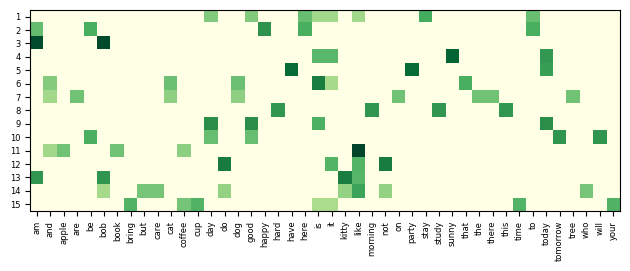

In [4]:
import matplotlib.pyplot as plt
import numpy as np

i2v = {i: v for v, i in vectorizer.vocabulary_.items()}
dense_tfidf = tf_idf.todense()  #转换为矩阵
show_tfidf(dense_tfidf, [i2v[i] for i in range(dense_tfidf.shape[1])], "tfidf_sklearn_matrix")

In [ ]:
import os
path = os.getcwd()
print("图片保存这里:",path)

## 抽取关键词语

参考资料：https://github.com/fxsjy/jieba

jieba.analyse.extract_tags(sentence, topK=20, withWeight=False, allowPOS=()) <br>
sentence 为待提取的文本 <br>
topK 为返回几个 TF/IDF 权重最大的关键词，默认值为 20 <br>
withWeight 为是否一并返回关键词权重值，默认值为 False <br>
allowPOS 仅包括指定词性的词，默认值为空，即不筛选 <br>

In [2]:
from jieba import analyse
text = "英语四六级是每名大学生都要经历的一项考试，每当考试结束之后，英语四六级考试都会出现不少“神翻译”。甚至有些老师调侃说：本身大量判卷是很辛苦的事情，但是这些“惊喜”真的是“苦中作乐”。"
tags = analyse.extract_tags(text, topK=20, withWeight=False, allowPOS=())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\17888\AppData\Local\Temp\jieba.cache
Loading model cost 0.872 seconds.
Prefix dict has been built successfully.


In [3]:
print(tags)

['四六级', '考试', '英语', '判卷', '苦中作乐', '每名', '调侃', '惊喜', '每当', '辛苦', '大学生', '翻译', '一项', '老师', '经历', '本身', '真的', '结束', '不少', '大量']


# 归一化问题

## 不归一

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# 实例化tf实例
tv = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
# 输入训练集矩阵，每行表示一个文本
train = ["Chinese Beijing Chinese",
          "Chinese Chinese Shanghai",
          "Chinese Macao",
          "Tokyo Japan Chinese"]

# 训练，构建词汇表以及词项idf值，并将输入文本列表转成VSM矩阵形式
tv_fit = tv.fit_transform(train)
# 查看一下构建的词汇表
print(tv.get_feature_names())

tv_fit.toarray().tolist()

['beijing', 'chinese', 'japan', 'macao', 'shanghai', 'tokyo']


[[1.916290731874155, 2.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 2.0, 0.0, 0.0, 1.916290731874155, 0.0],
 [0.0, 1.0, 0.0, 1.916290731874155, 0.0, 0.0],
 [0.0, 1.0, 1.916290731874155, 0.0, 0.0, 1.916290731874155]]

In [ ]:
tf = n
idf = lg((D+1)/(d+1))+1
tf*idf

In [9]:
1.916290731874155/(1.916290731874155+2)

0.4893126846476761

## 归一化_方法1 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(use_idf=True, smooth_idf=True,norm = 'l1')
# 输入训练集矩阵，每行表示一个文本
train = ["Chinese Beijing Chinese",
          "Chinese Chinese Shanghai",
          "Chinese Macao",
          "Tokyo Japan Chinese"]

# 训练，构建词汇表以及词项idf值，并将输入文本列表转成VSM矩阵形式
tv_fit = tv.fit_transform(train)
# 查看一下构建的词汇表
print(tv.get_feature_names())

# 查看输入文本列表的VSM矩阵
tv_fit.toarray().tolist()

['beijing', 'chinese', 'japan', 'macao', 'shanghai', 'tokyo']


[[0.4893126846476761, 0.5106873153523239, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.5106873153523239, 0.0, 0.0, 0.4893126846476761, 0.0],
 [0.0, 0.34290134007227385, 0.0, 0.6570986599277262, 0.0, 0.0],
 [0.0, 0.2069287413986741, 0.39653562930066294, 0.0, 0.0, 0.39653562930066294]]

## 归一化_方法2_默认的归一化方法

In [10]:
tv = TfidfVectorizer(use_idf=True, smooth_idf=True,norm = 'l2')#
# 输入训练集矩阵，每行表示一个文本
train = ["Chinese Beijing Chinese",
          "Chinese Chinese Shanghai",
          "Chinese Macao",
          "Tokyo Japan Chinese"]

# 训练，构建词汇表以及词项idf值，并将输入文本列表转成VSM矩阵形式
tv_fit = tv.fit_transform(train)
# 查看一下构建的词汇表
print(tv.get_feature_names())

# 查看输入文本列表的VSM矩阵
tv_fit.toarray().tolist()

['beijing', 'chinese', 'japan', 'macao', 'shanghai', 'tokyo']


[[0.6918346120039814, 0.7220560017292982, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.7220560017292982, 0.0, 0.0, 0.6918346120039814, 0.0],
 [0.0, 0.46263733109032296, 0.0, 0.8865476297873808, 0.0, 0.0],
 [0.0, 0.34618161159873423, 0.6633846138519129, 0.0, 0.0, 0.6633846138519129]]

In [11]:
0.6918346120039814*0.6918346120039814+0.7220560017292982*0.7220560017292982

0.9999999999999998

## 传统归一化 

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
vectorizer = CountVectorizer()  # 实例化
transformer = TfidfTransformer(norm = None)
#corpus = ["我 来到 中国 旅游", "中国 欢迎 你","我 喜欢 来到 中国 天安门"]
corpus = ["Chinese Beijing Chinese",
          "Chinese Chinese Shanghai",
          "Chinese Macao",
          "Tokyo Japan Chinese"]

In [26]:
norm1 = Normalizer(norm='l1')
a = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(a.toarray().tolist())

['beijing', 'chinese', 'japan', 'macao', 'shanghai', 'tokyo']
[[1, 2, 0, 0, 0, 0], [0, 2, 0, 0, 1, 0], [0, 1, 0, 1, 0, 0], [0, 1, 1, 0, 0, 1]]


In [17]:
a = norm1.fit_transform(a)
print(a.toarray().tolist())

[[0.3333333333333333, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0], [0.0, 0.6666666666666666, 0.0, 0.0, 0.3333333333333333, 0.0], [0.0, 0.5, 0.0, 0.5, 0.0, 0.0], [0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.3333333333333333]]


In [15]:
result_list2 = transformer.fit_transform(a).toarray().tolist()
word = vectorizer.get_feature_names()
#print(transformer.get_params())
print('词典为：')
print(word)
print('归一化后的tf-idf值为：')
for weight in result_list2:
    print(weight)

词典为：
['beijing', 'chinese', 'japan', 'macao', 'shanghai', 'tokyo']
归一化后的tf-idf值为：
[0.638763577291385, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.6666666666666666, 0.0, 0.0, 0.638763577291385, 0.0]
[0.0, 0.5, 0.0, 0.9581453659370776, 0.0, 0.0]
[0.0, 0.3333333333333333, 0.638763577291385, 0.0, 0.0, 0.638763577291385]


In [ ]:
tf = n/N
idf = 
tf*idf